In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123)

Text(0, 0.5, 'y')

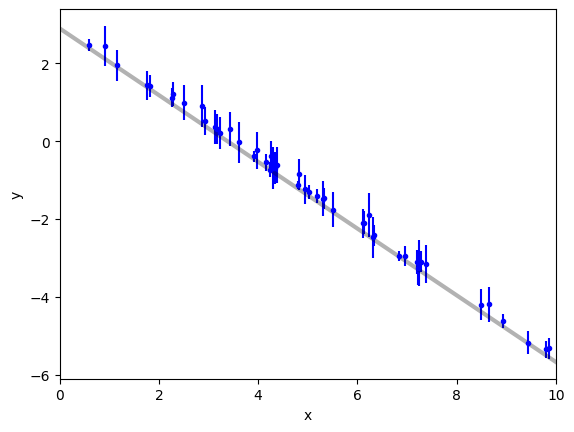

In [3]:
m_true = -0.8567
b_true = 2.896
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1 + 0.5*(np.random.rand(N))
y = m_true*x + b_true
y += yerr*np.random.rand(N)

plt.errorbar(x, y, yerr=yerr, fmt=".b")
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true*x0+b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

In [4]:
class GD:
  def __init__(self, theta_init, lr=0.01, max_iter=100, tol=1e-03):
    self.lr = lr
    self.max_iter = max_iter
    self.tol = tol
    self.theta = theta_init

  def calc_grad(self, X, y):
    N = len(y)
    yhat = X@self.theta
    grad = X.T@(yhat - y) / N
    return grad


  def fit(self, X, y):
    for i in range(self.max_iter):
      grad = self.calc_grad(X, y)
      step = self.lr*grad
      self.theta -= step
      if np.linalg.norm(grad) < self.tol:
        print("Converged at iteration {}".format(i))
        break
    return self.theta


  def predict(self, X):
    y_pred = X@self.theta
    return y_pred

In [5]:
x = x[:, np.newaxis]

In [6]:
X_train = np.c_[np.ones(len(x)), x]

In [7]:
y_train = y[:, np.newaxis]
print(y_train.shape)

(50, 1)


In [8]:
theta_init = np.random.randn(2, 1)

In [9]:
model = GD(theta_init, lr=0.01, max_iter=1000)
theta = model.fit(X_train, y_train)
print(theta)

[[ 2.61074807]
 [-0.78063609]]
